In [14]:
from dataclasses import dataclass
import csv

import click
import requests
import psycopg2
import psycopg2.extras
import pandas.io.sql as sqlio
import ipympl 


# importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [15]:
connection = psycopg2.connect(
        host="localhost",
        database="postgres",
        user="postgres",
        password="senha"
    )
curriculo ="testedqn5cenarios_04112023_0755_epsod_"
stmt = f"SELECT replace(SUBSTR (curriculo,LENGTH(curriculo)-7,9 ),'_e','e') epsodio,  porcentagem curriculo, count(porcentagem) qtd FROM \"Curriculos\" where curriculo like '{curriculo}_%' GROUP BY curriculo,porcentagem   order by cast(replace(SUBSTR (curriculo,LENGTH(curriculo)-1,2 ),'_','') as INTEGER), porcentagem" 

data = sqlio.read_sql_query(stmt, connection)

C:\Users\MArcelo\AppData\Local\Temp\ipykernel_19048\458497460.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = sqlio.read_sql_query(stmt, connection)


In [16]:
data = sqlio.read_sql_query(stmt, connection)
    # Now data is a pandas dataframe having the results of above query.
data.head()


C:\Users\MArcelo\AppData\Local\Temp\ipykernel_19048\3497097882.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = sqlio.read_sql_query(stmt, connection)


,epsodio,curriculo,qtd
0,epsod_0,"0.8,0.8,0.8,1,1",4
1,epsod_0,"1,1,1,0.1,0.1",8
2,epsod_0,"1,1,1,1,1",56
3,epsod_1,"1,1,1,0.1,0.1",4
4,epsod_1,"1,1,1,1,1",64


In [17]:
len(data)


51

In [18]:
def remove(epsodio):
  return epsodio[-2:].replace("_","")
  
data1 = data 
data1['ep'] = data['epsodio'].apply(remove)
data1 = data1.drop('epsodio', axis=1)
print(data1)

          curriculo  qtd  ep
0   0.8,0.8,0.8,1,1    4   0
1     1,1,1,0.1,0.1    8   0
2         1,1,1,1,1   56   0
3     1,1,1,0.1,0.1    4   1
4         1,1,1,1,1   64   1
5   0.8,0.8,0.8,1,1    4   2
6     1,1,1,0.1,0.1    4   2
7         1,1,1,1,1   56   2
8   0.1,0.1,0.1,1,1    4   3
9   0.5,0.5,0.5,1,1    4   3
10  0.8,0.8,0.8,1,1    4   3
11        1,1,1,1,1   56   3
12  0.5,0.5,0.5,1,1    4   4
13  0.8,0.8,0.8,1,1    4   4
14        1,1,1,1,1   60   4
15  0.5,0.5,0.5,1,1    4   5
16    1,1,1,0.1,0.1    8   5
17        1,1,1,1,1   56   5
18        1,1,1,1,1   68   6
19    1,1,1,0.1,0.1    4   7
20        1,1,1,1,1   64   7
21  0.8,0.8,0.8,1,1    4   8
22    1,1,1,0.1,0.1    4   8
23        1,1,1,1,1   60   8
24  0.8,0.8,0.8,1,1    4   9
25    1,1,1,0.1,0.1    8   9
26        1,1,1,1,1   56   9
27  0.1,0.1,0.1,1,1    4  10
28  0.8,0.8,0.8,1,1    8  10
29    1,1,1,0.1,0.1    4  10
30        1,1,1,1,1   52  10
31  0.1,0.1,0.1,1,1    4  11
32  0.8,0.8,0.8,1,1    8  11
33        1,1,

In [19]:




epsodios = data1.pivot(columns=['curriculo'],index='ep').sort_values(by="ep")
epsodios.head()

qtd                                                \
curriculo 0.1,0.1,0.1,1,1 0.5,0.5,0.5,1,1 0.8,0.8,0.8,1,1 1,1,1,0.1,0.1   
ep                                                                        
0                     NaN             NaN             4.0           8.0   
1                     NaN             NaN             NaN           4.0   
10                    4.0             NaN             8.0           4.0   
11                    4.0             NaN             8.0           NaN   
12                    NaN            12.0             NaN           4.0   

                     
curriculo 1,1,1,1,1  
ep                   
0              56.0  
1              64.0  
10             52.0  
11             52.0  
12             52.0

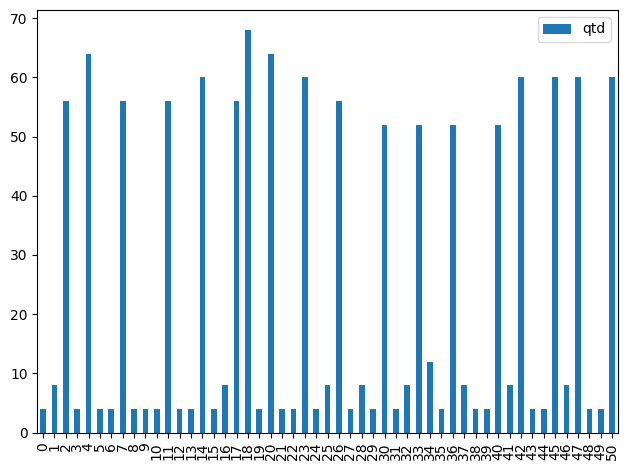

In [20]:
fig, ax = plt.subplots()
data1.plot.bar(ax=ax)
fig.tight_layout()

In [21]:
data3 = data 
data3['ep'] = data['epsodio'].apply(remove)
data3 = data3.drop('epsodio', axis=1)
print(data3)

          curriculo  qtd  ep
0   0.8,0.8,0.8,1,1    4   0
1     1,1,1,0.1,0.1    8   0
2         1,1,1,1,1   56   0
3     1,1,1,0.1,0.1    4   1
4         1,1,1,1,1   64   1
5   0.8,0.8,0.8,1,1    4   2
6     1,1,1,0.1,0.1    4   2
7         1,1,1,1,1   56   2
8   0.1,0.1,0.1,1,1    4   3
9   0.5,0.5,0.5,1,1    4   3
10  0.8,0.8,0.8,1,1    4   3
11        1,1,1,1,1   56   3
12  0.5,0.5,0.5,1,1    4   4
13  0.8,0.8,0.8,1,1    4   4
14        1,1,1,1,1   60   4
15  0.5,0.5,0.5,1,1    4   5
16    1,1,1,0.1,0.1    8   5
17        1,1,1,1,1   56   5
18        1,1,1,1,1   68   6
19    1,1,1,0.1,0.1    4   7
20        1,1,1,1,1   64   7
21  0.8,0.8,0.8,1,1    4   8
22    1,1,1,0.1,0.1    4   8
23        1,1,1,1,1   60   8
24  0.8,0.8,0.8,1,1    4   9
25    1,1,1,0.1,0.1    8   9
26        1,1,1,1,1   56   9
27  0.1,0.1,0.1,1,1    4  10
28  0.8,0.8,0.8,1,1    8  10
29    1,1,1,0.1,0.1    4  10
30        1,1,1,1,1   52  10
31  0.1,0.1,0.1,1,1    4  11
32  0.8,0.8,0.8,1,1    8  11
33        1,1,

In [52]:
data3 = data3.astype({'ep':'int'})
teste = data3.pivot(columns=['curriculo'],index='ep')
teste
#grup = data3.groupby(['ep','curriculo']).sum()
#grup

#grup = teste.groupby('ep')('0.1,0.1,0.1,1,1').sum()
#,'0.5,0.5,0.5,1,1','0.8,0.8,0.8,1,1','1,1,1,0.1,0.1','1,1,1,1,1')].sum()
#grup


qtd                                                \
curriculo 0.1,0.1,0.1,1,1 0.5,0.5,0.5,1,1 0.8,0.8,0.8,1,1 1,1,1,0.1,0.1   
ep                                                                        
0                     NaN             NaN             4.0           8.0   
1                     NaN             NaN             NaN           4.0   
2                     NaN             NaN             4.0           4.0   
3                     4.0             4.0             4.0           NaN   
4                     NaN             4.0             4.0           NaN   
5                     NaN             4.0             NaN           8.0   
6                     NaN             NaN             NaN           NaN   
7                     NaN             NaN             NaN           4.0   
8                     NaN             NaN             4.0           4.0   
9                     NaN             NaN             4.0           8.0   
10                    4.0             NaN             8.0           4.0   
11                    4.0             NaN             8.0           NaN   
12                    NaN            12.0             NaN           4.0   
13                    8.0             NaN             4.0           4.0   
14                    NaN             NaN             NaN           8.0   
15                    NaN             NaN             4.0           4.0   
16                    NaN             NaN             NaN           8.0   
17                    4.0             NaN             4.0           NaN   

                     
curriculo 1,1,1,1,1  
ep                   
0              56.0  
1              64.0  
2              56.0  
3              56.0  
4              60.0  
5              56.0  
6              68.0  
7              64.0  
8              60.0  
9              56.0  
10             52.0  
11             52.0  
12             52.0  
13             52.0  
14             60.0  
15             60.0  
16             60.0  
17             60.0

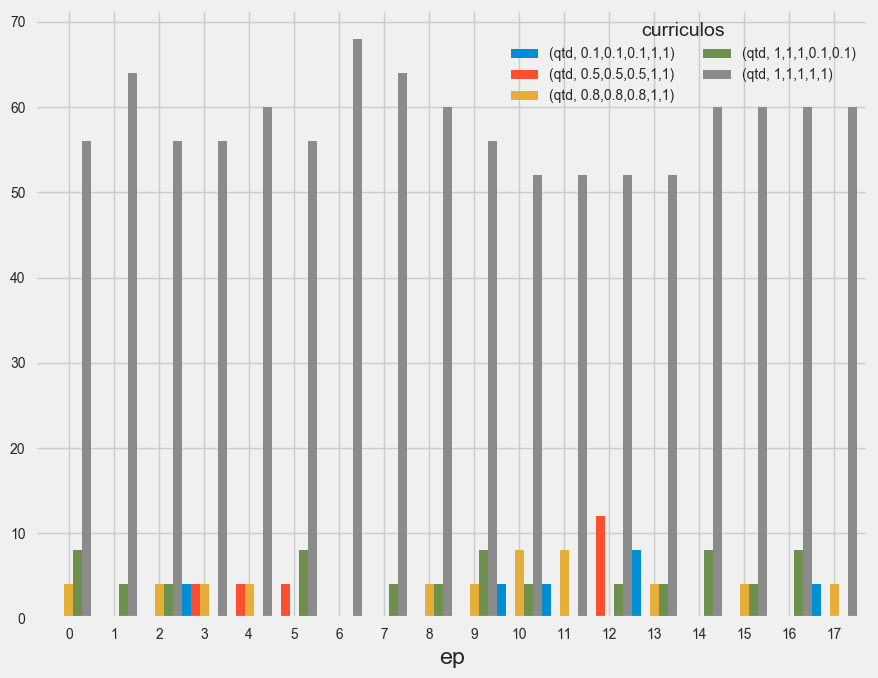

In [86]:

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
teste.plot(kind="bar",ax=ax ,width = 1,figsize=(9,7),rot=1)
fig.tight_layout()
handles, labels = ax.get_legend_handles_labels()
# reverse to keep order consistent
ax.legend(loc='upper right',ncol=2,title="curriculos")


array([<AxesSubplot:ylabel='qtd'>], dtype=object)

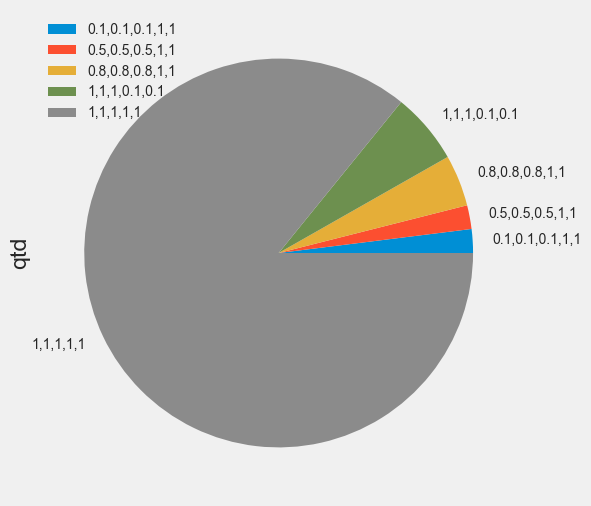

In [109]:
grup = data3.drop('ep', axis=1)
grup = grup.groupby(['curriculo']).sum()


grup.plot.pie(subplots=True, figsize=(11, 6))

